<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Camila J. Pulgar Fernández
- Nombre de alumno 2: Francisca Solís


### **Link de repositorio de GitHub:** `https://github.com/cpulgarf/Laboratorios`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

#Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# UMAP
!pip install umap-learn

     |████████████████████████████████| 25.3 MB 65 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 26.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=7ab38ea5582288937033ea61f654e7a1a8fc43d589ebe46c1fa60f4a0832d0b9
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=5fd4a14f1afce1eb982261c47080756c0a91b46216e189faed4f1f62b27e5f7e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

In [4]:
df_players = pd.read_csv('/content/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,1,12,11,12,12,13,25,48,12,37,35,12,22,19,25,21,17,52,52,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,1,13,11,11,12,11,15,43,12,27,22,14,27,26,16,19,21,42,45,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,2,44,39,40,29,35,44,42,38,41,35,35,48,42,62,60,64,34,83,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,1,17,13,11,11,14,23,46,12,13,28,15,20,15,42,40,40,61,60,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [5]:
df_players['Seleccionado_Nacional'] = df_players['National_Position'].fillna(0)  
df_players.loc[df_players['Seleccionado_Nacional'] != 0, 'Seleccionado_Nacional'] = 1

In [6]:
df_players.head(5)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado_Nacional
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1


In [7]:
df_players.groupby('Seleccionado_Nacional')['Seleccionado_Nacional'].count()

Seleccionado_Nacional
0    16513
1     1075
Name: Seleccionado_Nacional, dtype: int64

In [8]:
df_players["Seleccionado_Nacional"].value_counts().sort_values(ascending=False)/len(df_players) * 100

0    93.887878
1     6.112122
Name: Seleccionado_Nacional, dtype: float64

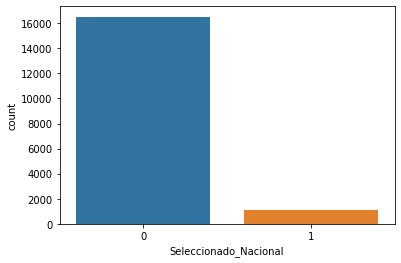

In [9]:
import seaborn as sns
sns.countplot(x='Seleccionado_Nacional',data=df_players)

In [10]:
df_players.isna().sum()

Name                         0
Nationality                  0
National_Position        16513
Club_Position                1
Height                       0
Weight                       0
Preffered_Foot               0
Age                          0
Work_Rate                    0
Weak_foot                    0
Skill_Moves                  0
Ball_Control                 0
Dribbling                    0
Marking                      0
Sliding_Tackle               0
Standing_Tackle              0
Aggression                   0
Reactions                    0
Interceptions                0
Vision                       0
Composure                    0
Crossing                     0
Short_Pass                   0
Long_Pass                    0
Acceleration                 0
Speed                        0
Stamina                      0
Strength                     0
Balance                      0
Agility                      0
Jumping                      0
Heading                      0
Shot_Pow

Se observa que un 93.88% (16513) de los jugadores son "No seleccionados", mientras que solo un 6.11% (1075) corresponde a "seleccinados"

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="http://vignette3.wikia.nocookie.net/inciclopedia/images/c/cd/Patada_Medel_Messi.gif/revision/latest?cb=20150705215005" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

**Respuesta:**

Para todas aquellas variables numéricas, se le aplicará un 
"StandarScaler", con el fin de normalizarlas, para aquellas variables categoricas, se le aplicará un "OneHotEncoder", dado que es más cómodo manejar las variables categoricas de esta forma

In [11]:
Preprocesamiento = ColumnTransformer( transformers=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'),  [	'Club_Position',  'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves']),
                                                    ('StandardScaler', StandardScaler(),['Height', 	   'Age',  'Ball_Control',  'Dribbling', 'Marking', 'Sliding_Tackle',  'Standing_Tackle',   
                                                                                         'Aggression',   'Reactions',  'Interceptions',   'Vision',  'Composure',  'Crossing',  'Short_Pass',  'Long_Pass',
                                                                                         'Acceleration',   'Speed',  'Stamina',   'Strength',   'Balance',   'Agility',   'Jumping',   'Heading',   'Shot_Power',
                                                                                         'Finishing',   'Long_Shots',   'Curve',   'Freekick_Accuracy',   'Penalties',   'Volleys'])])

Se crean 3 pipeline con los clasificadores:

> * Vecinos más cercanos
> * Logistic Regression 
> * Super Vector Machine


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Pipeline_1 = Pipeline([('Preprocesamiento', Preprocesamiento),
                         ('KNN', KNeighborsClassifier(n_neighbors=3))])

Pipeline_2 = Pipeline([('Preprocesamiento', Preprocesamiento),
                         ('Logistic Regression', LogisticRegression())])

Pipeline_3 = Pipeline([('Preprocesamiento', Preprocesamiento),
                         ('Super Vector Machine', SVC())])


### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

Separar los datos de entrenamiento en un conjunto de entrenamiento y de prueba

In [16]:
X = df_players.drop(['Seleccionado_Nacional'], axis=1)  
X = df_players.drop(['Name', 'National_Position'], axis=1) 
y = df_players['Seleccionado_Nacional']

Los datos se separarán con 70% en datos de entrenamiento y 30% en datos de testeo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = (1-(3/10)), random_state =  90)
y_train = y_train.astype(int)

Entrenando los pipeline

In [18]:
Pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
            

In [19]:
Pipeline_2.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
            

In [20]:
Pipeline_3.fit(X_train, y_train) 

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
            

In [21]:
y_test = y_test.astype(int)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pd.DataFrame(Pipeline_1.predict(X_test), columns = ["pred"])))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4981
           1       0.31      0.11      0.16       296

    accuracy                           0.94      5277
   macro avg       0.63      0.55      0.56      5277
weighted avg       0.91      0.94      0.92      5277



In [23]:
print(classification_report(y_test, pd.DataFrame(Pipeline_2.predict(X_test), columns = ["pred"])))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4981
           1       0.59      0.11      0.19       296

    accuracy                           0.95      5277
   macro avg       0.77      0.56      0.58      5277
weighted avg       0.93      0.95      0.93      5277



In [24]:
print(classification_report(y_test, pd.DataFrame(Pipeline_3.predict(X_test), columns = ["pred"])))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4981
           1       0.00      0.00      0.00       296

    accuracy                           0.94      5277
   macro avg       0.47      0.50      0.49      5277
weighted avg       0.89      0.94      0.92      5277



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Respuesta**:


> * ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?

Para el modelo 1: 

> * Accuracy: 0.94, casi la totalidad de los datos fueron bien predichos
> * Precision: 31%,hay un 31% de verdaderos positivos sobre los reales positivos
> * Recall: 11%, hay un 11% de los datos predichos positivos y que lo son, sobre los datos actuales positivos

Para el modelo 2:

> * Accuracy: 0.95, casi la totalidad de los datos fueron bien predichos
> * Precision: 59% , hay un 59% de verdaderos positivos sobre los reales positivos
> * Recall: 11%, hay un 11% de los datos predichos positivos y que lo son, sobre los datos actuales positivos

Para el modelo 3:

> * Accuracy: 0.94, casi la totalidad de los datos fueron bien predichos
> * Precision: 0%
> * Recall: 0%

> * ¿Podrían mejorarse los resultados?, ¿Cómo? : 

Sí, una forma es balanceando más los datos, puesto que desde un inicio se observó que el target estaba muy desbalanceado en torno a sus clases, esto claramente ejerce una influencia en el desempeño del modelo

> * ¿Influye la cantidad de ejemplos por clase? : 

Sí, puesto que al tener tan pocos datos de una de las dos clases, hace que exista una especie de sesgo a la hora de predecir, el modelo no sabrá identificar totalmente las "características" de la clase con menos datos



## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [113]:
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

In [114]:
df_players.loc[df_players.Club_Position.isin(ataque), "Position"] = "ataque" 
df_players.loc[df_players.Club_Position.isin(central_ataque), "Position"] = "central_ataque" 
df_players.loc[df_players.Club_Position.isin(central), "Position"] = "central" 
df_players.loc[df_players.Club_Position.isin(central_defensa), "Position"] = "central defensa" 
df_players.loc[df_players.Club_Position.isin(defensa), "Position"] = "defensa" 
df_players.loc[df_players.Club_Position.isin(arquero), "Position"] = "arquero" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [115]:
df_players.isna().sum()

Name                        0
Nationality                 0
National_Position        3573
Club_Position               0
Height                      0
Weight                      0
Preffered_Foot              0
Age                         0
Work_Rate                   0
Weak_foot                   0
Skill_Moves                 0
Ball_Control                0
Dribbling                   0
Marking                     0
Sliding_Tackle              0
Standing_Tackle             0
Aggression                  0
Reactions                   0
Interceptions               0
Vision                      0
Composure                   0
Crossing                    0
Short_Pass                  0
Long_Pass                   0
Acceleration                0
Speed                       0
Stamina                     0
Strength                    0
Balance                     0
Agility                     0
Jumping                     0
Heading                     0
Shot_Power                  0
Finishing 

In [116]:
df_players=df_players.dropna(subset=["Position"])

In [117]:
df_players.groupby('Position')['Position'].count()

Position
arquero             632
ataque              430
central             907
central defensa     209
central_ataque      581
defensa            1180
Name: Position, dtype: int64

In [176]:
X = df_players.drop(['Position'], axis=1)  
X = X.drop(['Name', 'National_Position', 'Seleccionado_Nacional'], axis=1) 
y = df_players['Position']

In [177]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 7/10, random_state =  90)

In [181]:
Preprocesamiento2 = ColumnTransformer( transformers=[ 
                                                     ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'),  [	'Club_Position',  'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves' ]),
                                                    ('StandardScaler', StandardScaler(),['Height', 	   'Age',  'Ball_Control',  'Dribbling', 'Marking', 'Sliding_Tackle',  'Standing_Tackle',   
                                                                                         'Aggression',   'Reactions',  'Interceptions',   'Vision',  'Composure',  'Crossing',  'Short_Pass',  'Long_Pass',
                                                                                         'Acceleration',   'Speed',  'Stamina',   'Strength',   'Balance',   'Agility',   'Jumping',   'Heading',   'Shot_Power',
                                                                                         'Finishing',   'Long_Shots',   'Curve',   'Freekick_Accuracy',   'Penalties',   'Volleys'])])

In [182]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
Pipeline_4 = Pipeline([('Preprocesamiento', Preprocesamiento2),
                         ('Naive Bayes Multi', GaussianNB())])

In [183]:
Pipeline_4.fit(X_train, y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
            

In [185]:
print(classification_report(y_test, pd.DataFrame(Pipeline_4.predict(X_test), columns = ["pred"])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       254
           3       0.98      1.00      0.99        56
           4       1.00      1.00      1.00       203
           5       1.00      1.00      1.00       353

    accuracy                           1.00      1182
   macro avg       1.00      1.00      1.00      1182
weighted avg       1.00      1.00      1.00      1182



**Respuesta**:

Se observa que los resultados no son los esperados, posiblemente generado por algún error de los datos, puesto que es muy raro que las métricas den tan perfecto

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

# **Pasos elección regresión**
Para la elección del modelo Ridge, lo que se hizo fue seguir los pasos de la guía sugerida. Por lo tanto PRIMERO: Se tienen más de 50 muestras, luego, como no se va a predecir una categoría, sino una cantidad se ecoge:

SEGUNDO: Categoría.
TERCERO: Cantidad
Luego, como se tienen menos de 100K muestras, se continua a la etapa de la cantidad de caracterísitcas que deberían importar, por lo tanto:
CUARTO: < 100K  -> YES
QUINTO: Few features... -> NO

Por lo tanto, se llega al RideRegression o el SVR (Kernel = 'linear'). 

Escogimos el RideRegression y en caso de obtener una mala métrica R^2, se podría cambiar el modelo por un EnsembleRegressor o SVR (Kernel ='rbf'), como sugieren en la guía.



# **Métrica  𝑅^2**
El $R^2$ o coeficiente de determinación es una métrica que se aplica a modelos de regresión que indica cuántos puntos de los datos están sobre la línea de la ecuación de la regresión.
Un valor de 1 es el máximo e indica que que es un buen modelo, de hecho, sobre 0.6 ya se puede considerar un modelo bueno. Para valores bajo 0.6, el modelo no es bueno.

La métrica corresponde a la varianza de la variable dependiente que es explicada por las variables del modelo, por lo que un alto $R^2$ indica que las variable independientes explican gran parte de la varianza de la variable dependiente.


In [37]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV

from sklearn.ensemble import RandomForestRegressor

In [40]:
df_sueldos = pd.read_csv('/content/salarios.csv' , index_col=[0])
df_sueldos.head(10)

,Player,Weekly Salary
1528,Lionel Messi,1538905.0
1006,Cristiano Ronaldo,1248536.0
1529,Antoine Griezmann,997032.0
2004,Neymar,797726.0
1530,Gareth Bale,607706.0
1532,Philippe Coutinho,508923.0
1531,Luis Suárez,508923.0
0,Alexis Sánchez,461765.0
1,Mesut Özil,461765.0
1535,Toni Kroos,434977.0


In [41]:
df_players.head(5)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado_Nacional,Position
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1,central_ataque
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1,central_ataque
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1,central_ataque
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1,ataque
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1,arquero


In [42]:
df_sueldos.rename(columns={'Player':'Name'},inplace=True)

In [43]:
df_completo = df_players.merge(df_sueldos, on = 'Name')

In [44]:
df_completo

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado_Nacional,Position,Weekly Salary
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,5,93,92,22,23,31,63,96,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,1,central_ataque,1248536.0
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,4,95,97,13,26,28,48,95,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,1,central_ataque,1538905.0
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,5,95,96,21,33,24,56,88,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,1,central_ataque,797726.0
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,4,91,86,30,38,45,78,93,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,1,ataque,508923.0
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,1,48,30,10,11,10,29,85,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,1,arquero,326233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Dennis Lippert,Germany,NaN,LB,172,63,Left,21,Medium / Medium,3,2,62,54,58,58,64,56,54,59,36,38,62,55,33,66,65,55,35,79,73,76,42,33,25,40,49,26,28,23,0,defensa,620.0
574,Charles Traoré,Mali,NaN,LB,180,74,Left,25,Medium / Low,2,2,39,67,61,64,65,55,57,66,39,38,52,33,29,64,63,77,70,65,56,62,45,27,30,32,38,40,45,29,0,defensa,13289.0
575,Will Norris,England,NaN,GK,191,76,Left,23,Medium / Medium,3,1,20,13,13,17,16,20,46,21,42,39,11,30,34,40,49,36,60,51,35,54,11,18,10,10,17,18,16,12,0,arquero,3958.0
576,Harvey Barnes,England,NaN,CAM,179,68,Left,19,Medium / Medium,3,3,59,62,41,44,48,48,44,43,55,56,50,58,51,77,75,58,48,58,65,41,40,57,50,52,56,52,49,50,0,central_ataque,13193.0


In [45]:
# Transformaciones para las variables numéricas y variables categóricas
preprocessor = ColumnTransformer( transformers=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'),  ['Club_Position',  'Preffered_Foot', 'Work_Rate', 'Weak_foot', 'Skill_Moves' , 'Nationality']),
                                                    ('StandardScaler', StandardScaler(),['Height', 	   'Age',  'Ball_Control',  'Dribbling', 'Marking', 'Sliding_Tackle',  'Standing_Tackle',   
                                                                                         'Aggression',   'Reactions',  'Interceptions',   'Vision',  'Composure',  'Crossing',  'Short_Pass',  'Long_Pass',
                                                                                         'Acceleration',   'Speed',  'Stamina',   'Strength',   'Balance',   'Agility',   'Jumping',   'Heading',   'Shot_Power',
                                                                                         'Finishing',   'Long_Shots',   'Curve',   'Freekick_Accuracy',   'Penalties',   'Volleys', 'Weekly Salary'])])

In [46]:
X = df_completo.drop(['Weekly Salary'], axis=1)  
X = df_completo.drop(['Name', 'National_Position'], axis=1) # features
y = df_completo['Weekly Salary'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, shuffle=True)

In [47]:
#pipe = Pipeline([('preprocessing', preprocessor),('modelo', Lasso())])
#pipe = Pipeline([('preprocessing', preprocessor),('modelo', Ridge())])

pipe = Pipeline([('preprocessing', preprocessor),('modelo', RandomForestRegressor())])

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate', 'Weak_foot',
                                                   'Skill_Moves',
                                                   'Nationality']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                           

In [50]:
# Predección
y_pred = pipe.predict(X_test)

In [51]:
# Evaluación
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)


0.9595614119359895

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```
Como se propuso, se estaba trabajando con el modelo de regresión Ridge, pero se obtenía una métrica R^2 negativa, por lo que el modelo no era bueno, se probaron dos alternativas, cambiar por un tipo de regresión Lasso, la cual tampoco dio buenos resultados y finalmente, se trabaja con el modelo RandomForestRegressor y se obtiene una métrica R^2 de 0.95 lo cual es un muy buen modelo. Podría evidentemente mejorar los resultados, para ello se podría utilizar quizás otro modelo de regresión.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>